In [1]:
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score

In [3]:
from sklearn.svm import SVC
def do_svm(Xt, Yt, Xv, Yv):
    clf = SVC(gamma=2, C=1)
    X_train = Xt.reshape(Xt.shape[0], -1)
    X_val = Xv.reshape(Xv.shape[0], -1)

    clf.fit(X_train, Yt)
    y_pred = clf.predict(X_val)
    score = roc_auc_score(Yv, y_pred), average_precision_score(Yv, y_pred), f1_score(Yv, y_pred>0.5)
    return score
    

In [4]:
import xgboost as xgb
def do_xgb(Xt, Yt, Xv, Yv):
    clf = xgb.XGBClassifier(max_depth=10,
  learning_rate=0.01,
  n_estimators=500,
  silent=True,
  objective='binary:logistic',
  nthread=-1,
  gamma=0,
  min_child_weight=1,
  max_delta_step=0,
  subsample=0.85,
  colsample_bytree=0.7,
  colsample_bylevel=1,
  reg_alpha=0,
  reg_lambda=1,
  scale_pos_weight=1,
  seed=1440,
  missing=None)
    X_train = Xt.reshape(Xt.shape[0], -1)
    X_val = Xv.reshape(Xv.shape[0], -1)

    clf.fit(X_train, Yt)
    y_pred = clf.predict(X_val)
    score = roc_auc_score(Yv, y_pred), average_precision_score(Yv, y_pred), f1_score(Yv, y_pred>0.5)
    return score


In [5]:
import keras
from keras import regularizers
from keras.callbacks import EarlyStopping
n_class = 2

Using TensorFlow backend.


In [8]:
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout, Flatten,Conv2D
def do_cnn(Xt, Yt, Xv, Yv):
    batch_size = 32
    epochs = 100
    img_rows, img_cols = 21, 21
    
    x_train = Xt.reshape(Xt.shape[0], img_rows, img_cols, 1)
    x_val = Xv.reshape(Xv.shape[0], img_rows, img_cols, 1)
    y_train = keras.utils.to_categorical(Yt, n_class)
    
    model = Sequential()
    input_shape=(img_rows, img_cols, 1)
    model.add(Conv2D(16, kernel_size=(3, 3), 
                     activation='relu',
                     padding='same',
                     input_shape=input_shape))
    
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', activity_regularizer=regularizers.l1(0.0001)))
    model.add(Dropout(0.25))
    model.add(Dense(n_class, activation='softmax'))
    
    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    early_stopping=EarlyStopping(monitor='val_loss', mode='auto',min_delta=0.01,patience=5, verbose=0)
    model.fit(x_train, y_train, validation_split=0.1,batch_size=batch_size, epochs=epochs, verbose=0,callbacks=[early_stopping])

    weighted_prediction=model.predict(x_val)
    
    
    y_pred = weighted_prediction[:,1]
    score = roc_auc_score(Yv, y_pred), average_precision_score(Yv, y_pred), f1_score(Yv, y_pred>0.5)
    return score

def do_cnn_1616(Xt, Yt, Xv, Yv, n1, n2):
    batch_size = 32
    epochs = 25
    img_rows, img_cols = 21, 21
    
    x_train = Xt.reshape(Xt.shape[0], img_rows, img_cols, 1)
    x_val = Xv.reshape(Xv.shape[0], img_rows, img_cols, 1)
    y_train = keras.utils.to_categorical(Yt, n_class)
    
    model = Sequential()
    input_shape=(img_rows, img_cols, 1)
    model.add(Conv2D(n1, kernel_size=(3, 3), 
                     activation='relu',
                     padding='same',
                     input_shape=input_shape))
    
    model.add(Conv2D(n2, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(n_class, activation='softmax'))
    
    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    early_stopping=EarlyStopping(monitor='val_loss', mode='auto',min_delta=0.01,patience=5, verbose=0)
    model.fit(x_train, y_train, validation_split=0.1,batch_size=batch_size, epochs=epochs, verbose=0,callbacks=[early_stopping])
    
    weighted_prediction=model.predict(x_val)
    
    
    y_pred = weighted_prediction[:,1]
    score = roc_auc_score(Yv, y_pred), average_precision_score(Yv, y_pred), f1_score(Yv, y_pred>0.5)
    return score

In [9]:
def do_dense(Xt, Yt, Xv, Yv):
    batch_size = 32
    epochs = 100
    
    x_train = Xt.reshape(Xt.shape[0], -1)
    x_val = Xv.reshape(Xv.shape[0], -1)
    y_train = keras.utils.to_categorical(Yt, n_class)
    
    model = Sequential()
    model.add(Dense(32, activation='relu',input_dim=441))
    model.add(Dense(n_class, activation='softmax'))
    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    early_stopping=EarlyStopping(monitor='val_loss', mode='auto',min_delta=0.01,patience=5, verbose=0)
    model.fit(x_train, y_train, validation_split=0.1,batch_size=batch_size, epochs=epochs,verbose=1,callbacks=[early_stopping])
    
    weighted_prediction = model.predict(x_val)
    
    y_pred = weighted_prediction[:,1]
    score = roc_auc_score(Yv, y_pred), average_precision_score(Yv, y_pred), f1_score(Yv, y_pred>0.5)
    return score
    

In [11]:
import pickle
with open('all_samples.pkl','rb') as fi:
    (X,Y) = pickle.load(fi)

In [12]:
N = X.shape[0]
k = 5
nval = N // k

In [13]:
#shuffle
p = np.random.permutation(N)
X = X[p]
Y = Y[p]
Y=Y.astype(np.int)

In [14]:
def balance_positive_data(X, Y, p):
    nd = X.shape[0]
    assert(nd==Y.shape[0])
    sel = []
    for i in range(nd):
        if Y[i] == 1:
            sel.append(i)
        elif np.random.random()>=p:
            sel.append(i)
    return X[sel], Y[sel]

In [18]:
X_train = X
Y_train = Y

X_train, Y_train = balance_positive_data(X_train, Y_train,0.814)
print(np.sum(Y_train), "/", Y_train.shape[0])
print(np.sum(Y_train)/Y_train.shape[0])
print(1-(np.sum(Y_train)/Y_train.shape[0]))

1275 / 2567
0.4966887417218543
0.5033112582781457


In [19]:
svm_results = []
xgb_results = []
den_results = []
cnn_results = []
cnn1616_results = []
for fold in range(k):
    X_val = X[nval*fold:nval*(fold+1)]
    X_train = np.concatenate( (X[:nval*fold], X[nval*(fold+1):]), axis=0 )
    Y_val = Y[nval*fold:nval*(fold+1)]
    Y_train = np.concatenate( (Y[:nval*fold], Y[nval*(fold+1):]), axis=0 )

    X_train, Y_train = balance_positive_data(X_train, Y_train, 0.814)
    print (np.sum(Y_train), "/", Y_train.shape[0], "and", np.sum(Y_val), "/", Y_val.shape[0])
    
    svm_results.append(do_svm(X_train, Y_train, X_val, Y_val))
    xgb_results.append(do_xgb(X_train, Y_train, X_val, Y_val))
    den_results.append(do_dense(X_train, Y_train, X_val, Y_val))
    cnn_results.append(do_cnn(X_train, Y_train, X_val, Y_val))
    cnn1616_results.append(do_cnn_1616(X_train, Y_train, X_val, Y_val, 16, 16))

1016 / 2087 and 259 / 1662
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                14144     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 14,210
Trainable params: 14,210
Non-trainable params: 0
_________________________________________________________________
Train on 1878 samples, validate on 209 samples
Epoch 1/100
1878/1878 [==============================] - 0s 58us/step - loss: 0.6329 - accuracy: 0.8035 - val_loss: 0.5744 - val_accuracy: 0.8517
Epoch 2/100
1878/1878 [==============================] - 0s 25us/step - loss: 0.4992 - accuracy: 0.8482 - val_loss: 0.4470 - val_accuracy: 0.8565
Epoch 3/100
1878/1878 [==============================] - 0s 23us/step - loss: 0.3932 - accuracy: 0.8647 - val_loss: 0.3862 - val_accuracy: 0.8565


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 21, 21, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 16)        2320      
_________________________________________________________________
flatten_4 (Flatten)          (None, 5776)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 11554     
Total params: 14,034
Trainable params: 14,034
Non-trainable params: 0
_________________________________________________________________
1008 / 2076 and 267 / 1662
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                14144     
_

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 21, 21, 16)        160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 19, 19, 16)        2320      
_________________________________________________________________
flatten_8 (Flatten)          (None, 5776)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 11554     
Total params: 14,034
Trainable params: 14,034
Non-trainable params: 0
_________________________________________________________________
1031 / 2084 and 244 / 1662
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                14144     

# plot

In [20]:
data=[]
sc_name = ["AUC", "AP","F1"]
for j in range(len(sc_name)):
    temp_list=[]
    for i in range(k):
        temp_list.append(["SVM", i+1, svm_results[i][j]])
        temp_list.append(["XGB", i+1, xgb_results[i][j]])
        temp_list.append(["DEN", i+1, den_results[i][j]])
        temp_list.append(["CNN", i+1, cnn_results[i][j]])
        temp_list.append(["CNNmin", i+1, cnn1616_results[i][j]])
    data.append(temp_list)

In [21]:
data

[[['SVM', 1, 0.8695913610382606],
  ['XGB', 1, 0.8677200263087648],
  ['DEN', 1, 0.9197527636586796],
  ['CNN', 1, 0.9173172765474975],
  ['CNNmin', 1, 0.9195188468174925],
  ['SVM', 2, 0.8753164538352294],
  ['XGB', 2, 0.8701752735249062],
  ['DEN', 2, 0.9156534753320377],
  ['CNN', 2, 0.91030500122024],
  ['CNNmin', 2, 0.9113341193835877],
  ['SVM', 3, 0.8832910474809713],
  ['XGB', 3, 0.8655954250734968],
  ['DEN', 3, 0.9318083578322796],
  ['CNN', 3, 0.9351939108372599],
  ['CNNmin', 3, 0.9325413126065536],
  ['SVM', 4, 0.8766926432652179],
  ['XGB', 4, 0.8689199227455059],
  ['DEN', 4, 0.9200902202833565],
  ['CNN', 4, 0.9198984346510718],
  ['CNNmin', 4, 0.9189665185505328],
  ['SVM', 5, 0.9025324284954566],
  ['XGB', 5, 0.8769509121598186],
  ['DEN', 5, 0.9357644107378206],
  ['CNN', 5, 0.939666235057458],
  ['CNNmin', 5, 0.9386691021757728]],
 [['SVM', 1, 0.4898034579480657],
  ['XGB', 1, 0.49488281549022495],
  ['DEN', 1, 0.6733097267169728],
  ['CNN', 1, 0.6722283832339234],


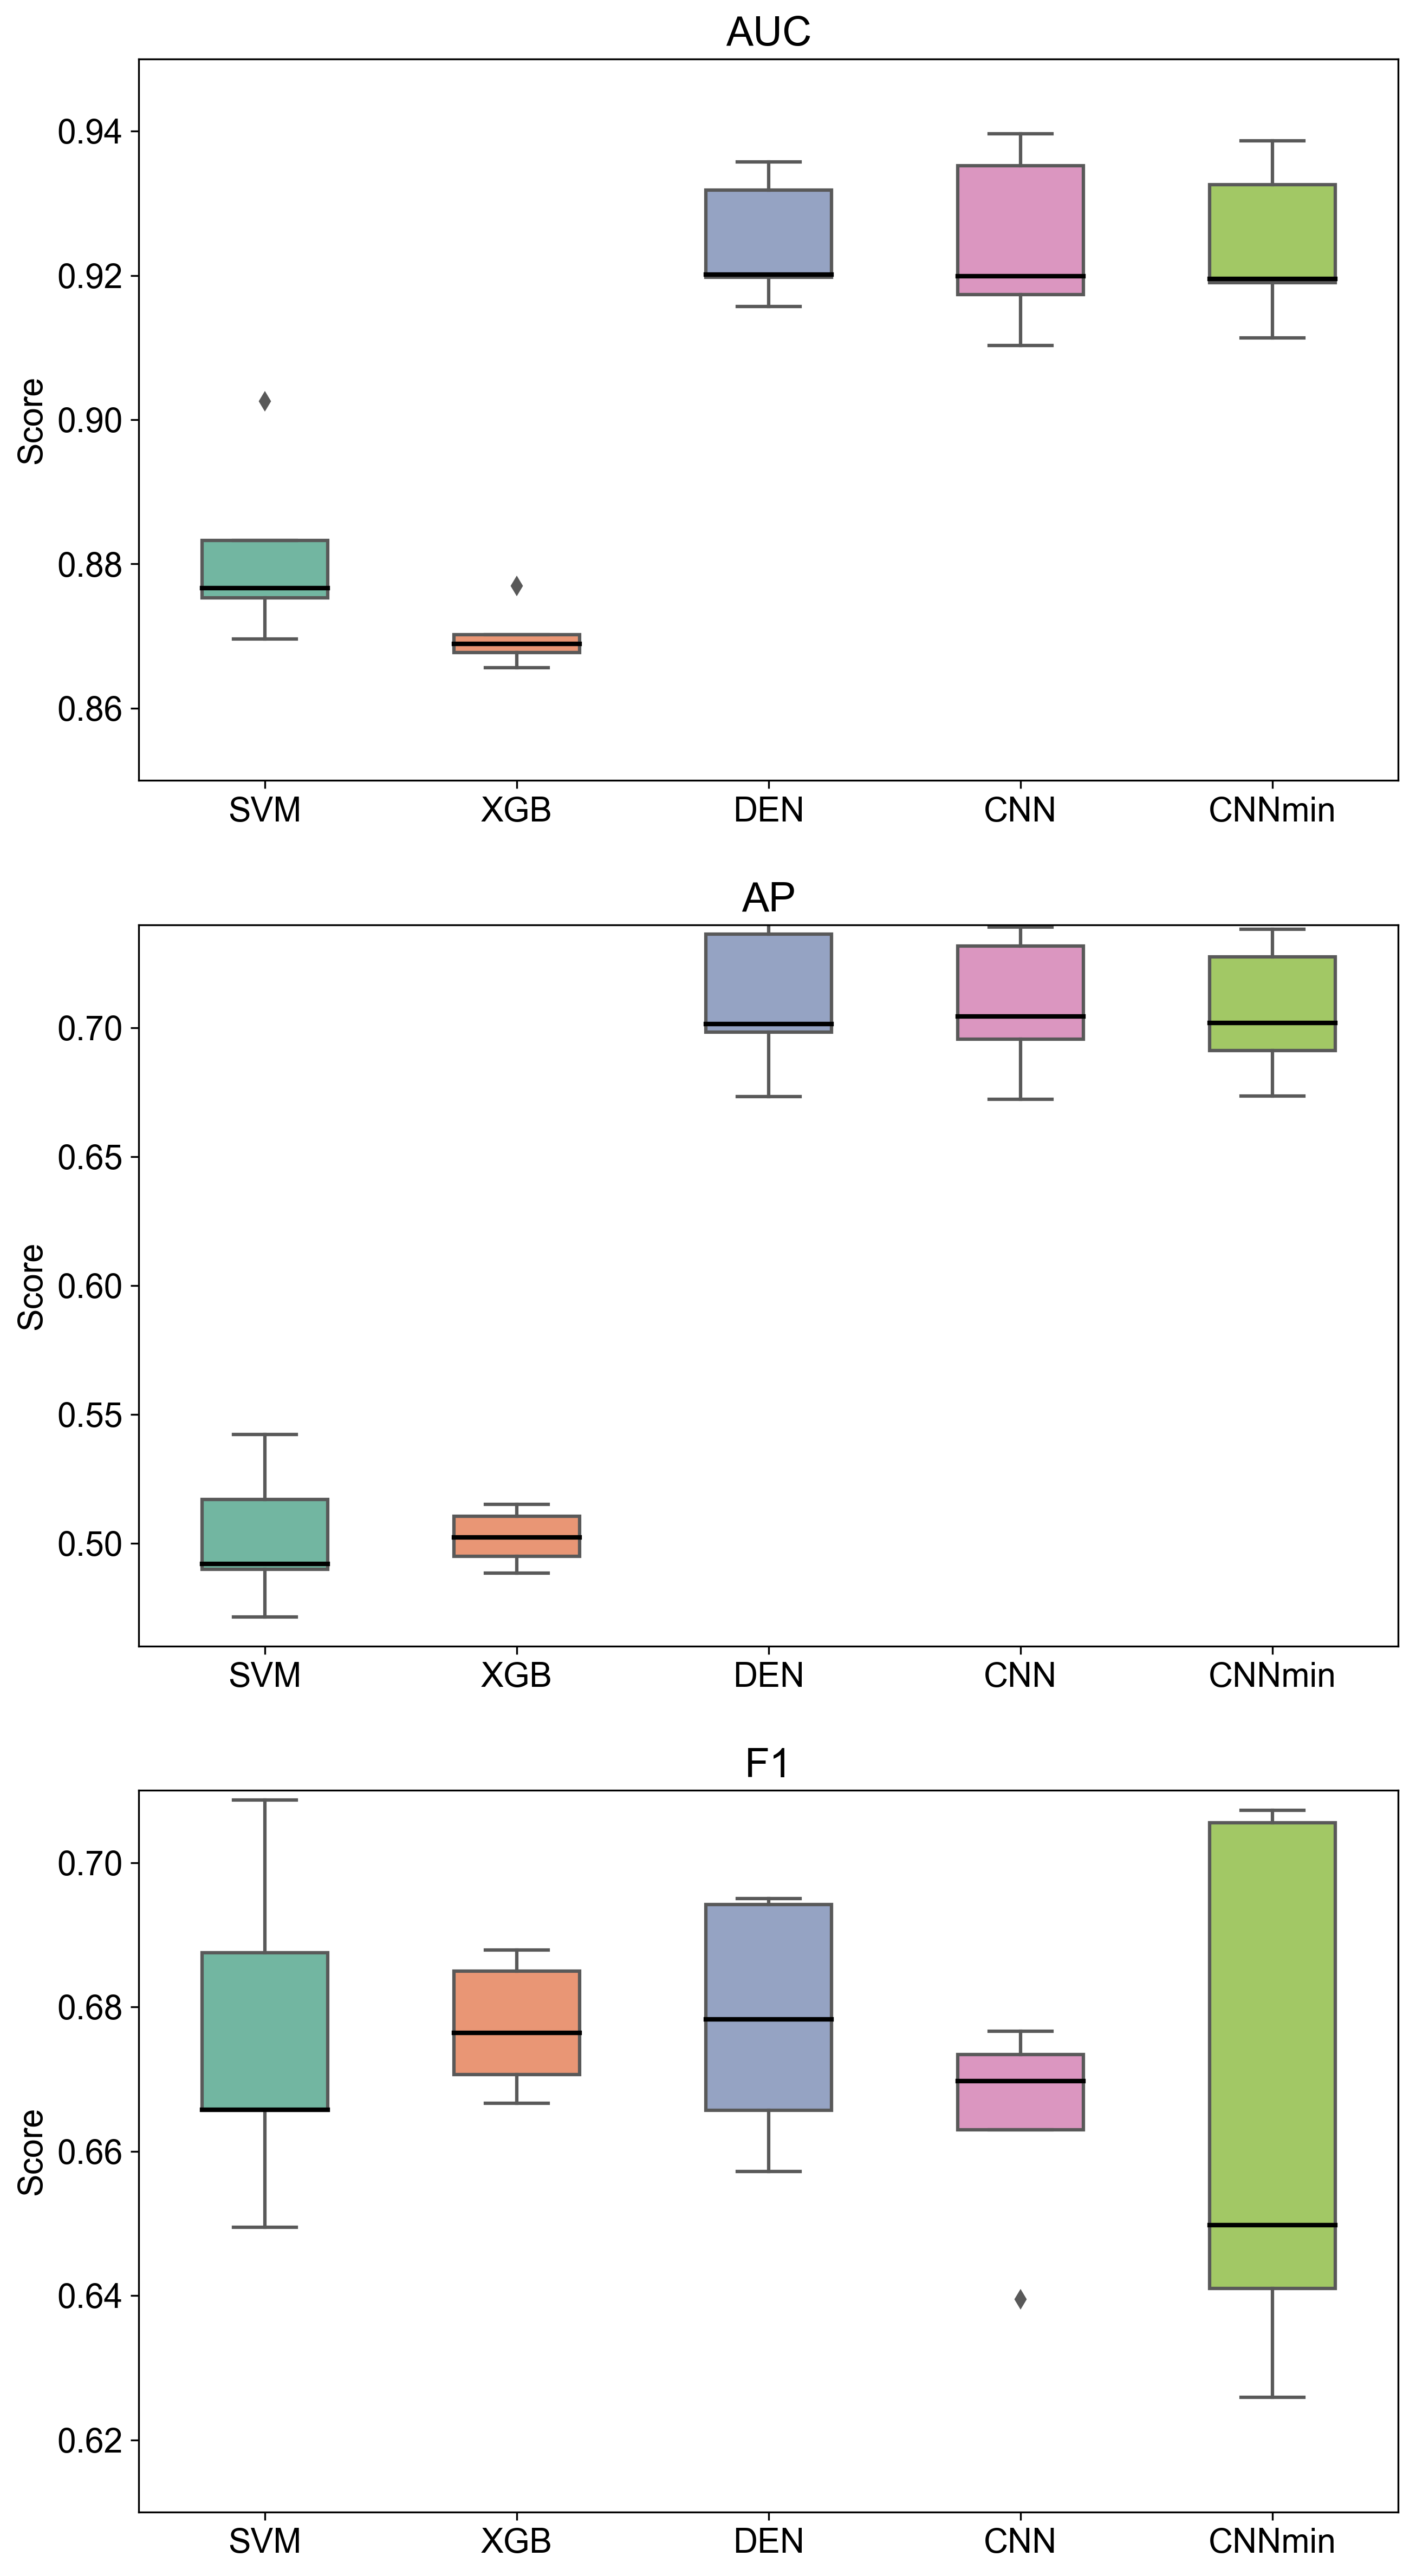

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns                           
import pandas as pd

plt.rcParams["font.family"]="Arial"
plt.rcParams["font.size"]=15
fig,axs=plt.subplots(3,1,figsize=(10,20),dpi=300)

for idx in range(len(sc_name)):
    df = pd.DataFrame(data[idx], columns=["name","rep","sc"])
    sns.boxplot(x="name",y="sc",data=df,ax=axs[idx],palette='Set2',width=0.5,medianprops={'linewidth':2,'color':'black'})
    axs[idx].set_xlabel('')
    axs[idx].set_xticklabels(axs[idx].get_xticklabels())
    axs[idx].set_ylabel('Score')
    axs[idx].set_title(sc_name[idx])
axs[0].set_ylim(0.85,0.95)
axs[1].set_ylim(0.46,0.74)
axs[2].set_ylim(0.61,0.71)

plt.show()


In [36]:
import h5py
def do_dense_all(Xt, Yt):
    batch_size = 32
    epochs = 100
    
    x_train = Xt.reshape(Xt.shape[0], -1)
    y_train = keras.utils.to_categorical(Yt, n_class)
    
    model = Sequential()
    model.add(Dense(32, activation='relu',input_dim=441))
    model.add(Dense(n_class, activation='softmax'))
    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    early_stopping=EarlyStopping(monitor='val_loss', mode='auto',min_delta=0.01,patience=5, verbose=0)
    model.fit(x_train, y_train, validation_split=0.1,batch_size=batch_size, epochs=epochs,verbose=1,callbacks=[early_stopping])
    model.save("dense_model_balanced8314.h5")

    return "model save:dense_model8314.h5"

for fold in range(1):
    X = X[p]
    Y = Y[p]
    X_train = X
    Y_train = Y
    X_train, Y_train = balance_positive_data(X_train, Y_train,0.815)
    do_dense_all(X_train, Y_train)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                14144     
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 66        
Total params: 14,210
Trainable params: 14,210
Non-trainable params: 0
_________________________________________________________________
Train on 2351 samples, validate on 262 samples
Epoch 1/100
2351/2351 [==============================] - 0s 50us/step - loss: 0.6301 - accuracy: 0.8179 - val_loss: 0.5539 - val_accuracy: 0.8321
Epoch 2/100
2351/2351 [==============================] - 0s 22us/step - loss: 0.4727 - accuracy: 0.8494 - val_loss: 0.3999 - val_accuracy: 0.8359
Epoch 3/100
2351/2351 [==============================] - 0s 22us/step - loss: 0.3801 - accuracy: 0.8558 - val_loss: 0.3506 - val_accuracy: 0.8473
Epoch 4/100
2351/2351 [===